In [1]:
%matplotlib inline
import sys
sys.path.append('../../Transformer')
import os
import numpy as np
import torch
import dill
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
from helper import *
import visualization

## Load nuScenes SDK and data

In [2]:
nuScenes_data_path = "../../data/sets/nuscenes/v1.0"
nuScenes_devkit_path = './devkit/python-sdk/'
sys.path.append(nuScenes_devkit_path)
from nuscenes.map_expansion.map_api import NuScenesMap
nusc_map = NuScenesMap(dataroot=nuScenes_data_path, map_name='boston-seaport')

In [3]:
line_colors = ['#375397','#80CBE5','#ABCB51','#F05F78', '#C8B0B0']

# Map Encoding Demo

In [4]:
with open('../processed_data/nuScenes_test_map_full.pkl', 'rb') as f:
    eval_env = dill.load(f, encoding='latin1')
eval_scenes = eval_env.scenes

In [5]:
ph = 6
log_dir = './models'

In [6]:
model_dir = os.path.join(log_dir, 'CNN_transformer') 
eval_stg, hyp = load_model(model_dir, eval_env, ts=20)


Loading from ./models/CNN_transformer/model_registrar-20.pt
Loaded!



In [7]:
scene = eval_scenes[25]
scene.name

'105'

In [8]:
# Define ROI in nuScenes Map
x_min = 773.0
x_max = 1100.0
y_min = 1231.0
y_max = 1510.0

In [9]:
layers = ['drivable_area',
          'road_segment',
          'lane',
          'ped_crossing',
          'walkway',
          'stop_line',
          'road_divider',
          'lane_divider']

## Prediction including Map Encoding

../../Transformer/environment/map.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angles = torch.tensor(rotation)


future :  [[ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]]
pred :  [[[[ 868.13348389 1394.63696289]
   [ 868.13833618 1394.62863159]
   [ 868.13294983 1394.63555908]
   [ 868.13889313 1394.628479  ]
   [ 868.14666748 1394.63951111]
   [ 868.15747833 1394.66278076]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 864.98876106 1403.76269188]
 [ 863.35340327 1399.26617441]
 [ 861.83880705 1396.10308345]]
pred :  [[[[ 864.6668396  1403.24992371]
   [ 863.77281952 1399.08323669]
   [ 861.76535034 1394.20404053]
   [ 859.75855255 1389.16238403]
   [ 857.50559998 1383.99780273]
   [ 854.95280457 1378.64924622]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 893.4859278  1411.41910425]
 [ 893.08057079 1411.65236569]
 [ 892.22105983 1412.06523367]
 [ 891.01024446 1412.62601339]
 [ 889.61682359 1413.20455647]
 [ 887.76580704 1413.99023464]]
pred :  [[[[nan nan]
   [nan nan]
   [nan nan]
   [nan nan]
   [nan nan]
   [nan nan]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 932.82553464 1388.87205209]
 [ 938.09884316 1387.40721907]
 [ 942.70189758 1386.08099627]
 [ 947.0027827  1384.92231369]
 [ 951.33824634 1383.87586689]
 [ 954.9369968  1383.08539074]]
pred :  [[[[ 932.80967712 1388.72648621]
   [ 937.43647766 1387.19616699]
   [ 941.9389801  1385.91567993]
   [ 946.24217224 1384.43147278]
   [ 950.68022156 1383.05897522]
   [ 954.92967224 1381.7600708 ]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 858.9927675  1424.36453171]
 [ 861.75585962 1421.28741111]
 [ 863.81996745 1418.12774041]
 [ 865.31954459 1415.09289446]
 [ 866.31804207 1412.18588605]
 [ 866.93580634 1409.04833215]]
pred :  [[[[ 858.27916718 1424.63041687]
   [ 861.70963287 1421.30448914]
   [ 864.67577362 1418.00117493]
   [ 867.46366882 1414.91461182]
   [ 870.04162598 1411.95881653]
   [ 872.55709839 1409.23712158]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 883.96803545 1415.186604  ]
 [ 882.71867937 1415.46995813]
 [ 881.48786551 1415.59350372]
 [ 879.84093915 1415.55608254]
 [ 878.06586437 1415.1344139 ]
 [ 876.36546976 1414.487905  ]]
pred :  [[[[ 883.92694092 1415.30250549]
   [ 882.80620575 1415.5488739 ]
   [ 881.26695251 1416.00758362]
   [ 879.55984497 1416.43409729]
   [ 877.942276   1416.91654968]
   [ 876.13459778 1417.5868988 ]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 892.87206104 1404.27142972]
 [ 897.71143263 1401.92589412]
 [ 902.19805609 1399.88073638]
 [ 906.66980528 1397.94591911]
 [ 911.22150026 1396.09845835]
 [ 915.66196923 1394.39198325]]
pred :  [[[[ 893.02922821 1404.15124512]
   [ 897.43715668 1401.65556335]
   [ 902.05560303 1399.68670654]
   [ 906.72819519 1397.63424683]
   [ 911.58338928 1395.51289368]
   [ 915.99081421 1393.1829071 ]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


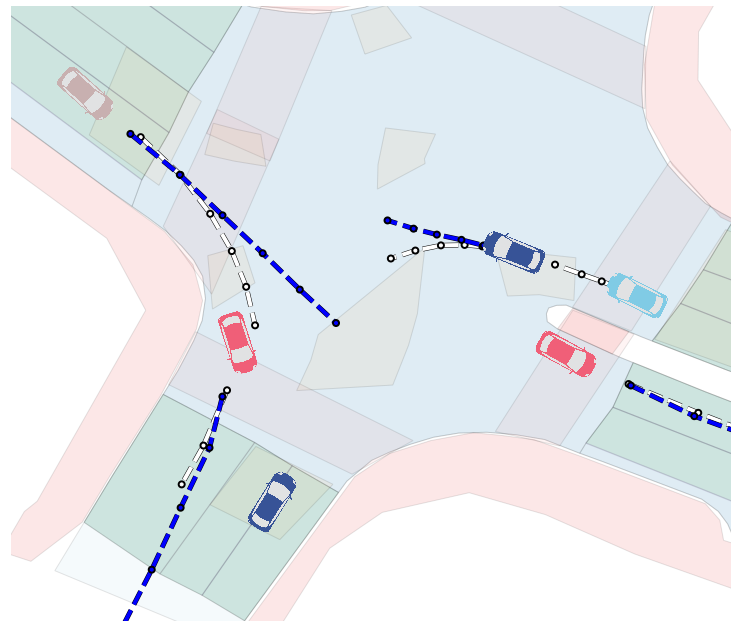

In [11]:
ph = 6
with torch.no_grad():
    timestep = np.array([8])
    predictions, _ = eval_stg.predict(scene,
                                       timestep,
                                       ph)

#     predictions_mm = eval_stg.predict(scene,
#                                       timestep,
#                                       ph,
#                                       num_samples=1,
#                                       z_mode=True,
#                                       gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

#     plot_vehicle_mm(ax,
#                     predictions_mm,
#                     scene.dt,
#                     max_hl=10,
#                     ph=ph,
#                     map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_map_pos.pdf', dpi=300, bbox_inches='tight')

## Prediction without Map Encoding

In [ ]:
model_dir = os.path.join(log_dir, 'int_ee') 
eval_stg_nm, hyp = load_model(model_dir, eval_env, ts=12)

In [ ]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_nm.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_nm.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_pos.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output

In [18]:
model_dir = os.path.join(log_dir, 'ee_vel') 
eval_stg_vel, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/ee_vel/model_registrar-12.pt
Loaded!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


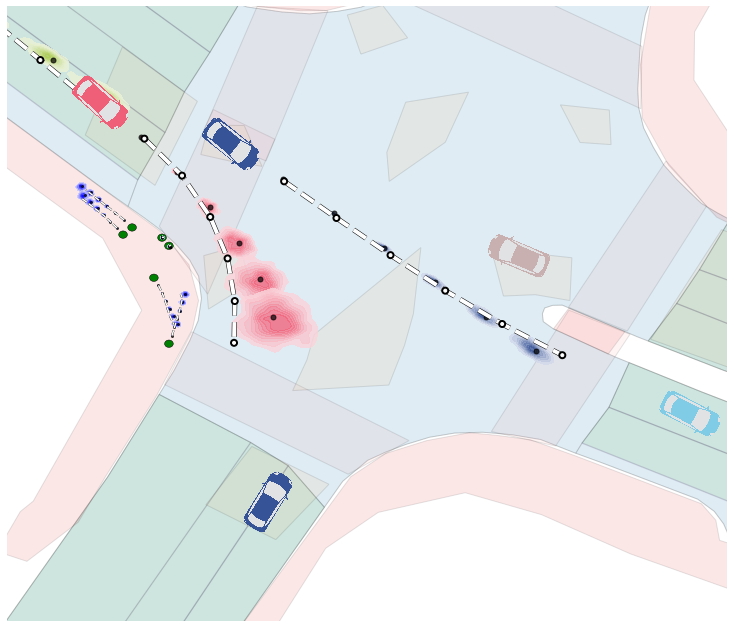

In [19]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_vel.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output and map

In [15]:
model_dir = os.path.join(log_dir, 'me_vel') 
eval_stg_vel_map, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/me_vel/model_registrar-12.pt
Loaded!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


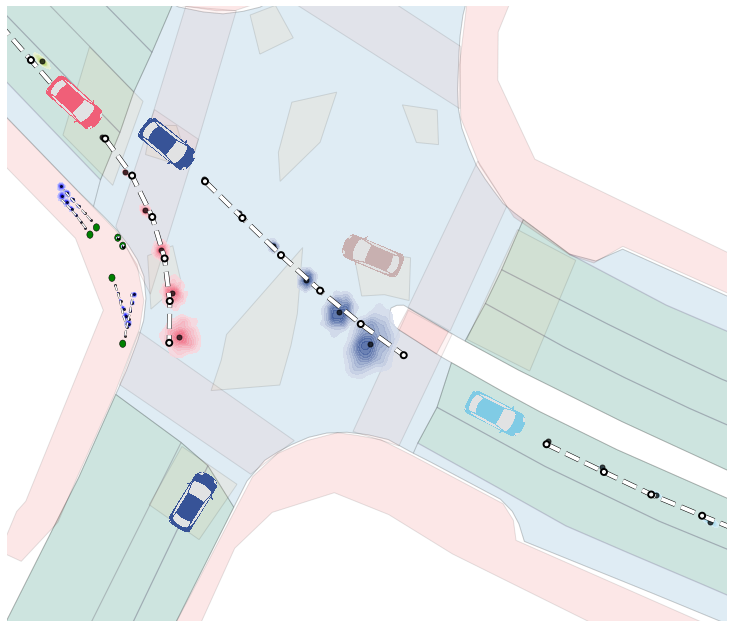

In [17]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel_map.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel_map.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_map_vel.pdf', dpi=300, bbox_inches='tight')

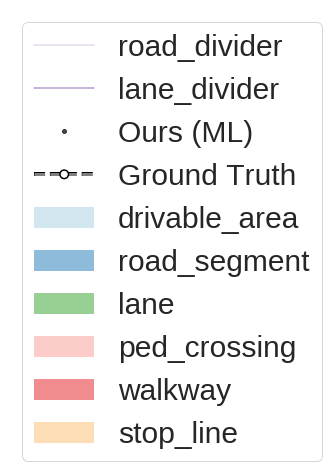

In [10]:
my_patch = (0, 0, 1, 1)
fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(1, 1), alpha=0.1, render_egoposes_range=False)
ax.plot([], [], 'ko',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (ML)')

ax.plot([],
        [],
        'w--o', label='Ground Truth',
        linewidth=3,
        path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
leg = ax.legend(loc='upper left', fontsize=30, frameon=True)
for lh in leg.legendHandles:
    lh.set_alpha(.5)
ax.axis('off')
ax.grid('off')
fig.savefig('plots/qual_nuScenes_legend.pdf', dpi=300, bbox_inches='tight')